In [10]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [11]:
file_path = "data.csv"
df = pd.read_csv(file_path,encoding="utf-8")
df.columns.tolist()

['CYCLE START',
 'SHIFT DATE (dd-mm-yyyy)',
 'SHIFT ID',
 'OPERATOR NAME',
 'DUMPER NO',
 'ASSIGNED TO SHOVEL',
 'LOAD LOCATION NAME',
 'MATERIAL',
 'DUMP LOCATION NAME',
 'EMPTY TIME  (minutes)',
 'EMPTY STOP TIME (minutes)',
 'QUEUE AT LU (minutes)',
 'WAIT AT LU (minutes)',
 'SPOTTING TIME (minutes)',
 'LOADING TIME (minutes)',
 'HAULING    TIME (minutes)',
 'HAULING STOP     TIME (minutes)',
 'WAITING TIME DUMP (minutes)',
 'DUMP TIME (minutes)',
 'LOAD TONS',
 'TOTAL LEAD DISTANCE (KM)',
 'TOTAL CYCLE TIME (minutes)',
 'FUEL CONSUMED (in ltrs)']

In [12]:
df.sample(5)

,CYCLE START,SHIFT DATE (dd-mm-yyyy),SHIFT ID,OPERATOR NAME,DUMPER NO,ASSIGNED TO SHOVEL,LOAD LOCATION NAME,MATERIAL,DUMP LOCATION NAME,EMPTY TIME (minutes),...,SPOTTING TIME (minutes),LOADING TIME (minutes),HAULING TIME (minutes),HAULING STOP TIME (minutes),WAITING TIME DUMP (minutes),DUMP TIME (minutes),LOAD TONS,TOTAL LEAD DISTANCE (KM),TOTAL CYCLE TIME (minutes),FUEL CONSUMED (in ltrs)
61310,2023-11-02 21:15:06,2023-11-02,2,Sarat Kr. Sahoo,O2K058,E582,NIM_HILL6_684,Wet Rest 1,WET PRIMARY CRUSHER,7.62,...,0.0,4.93,5.08,0.02,1.17,0.38,124.9,6.505,28.16,28.7778
38565,2023-10-05 07:11:16,2023-10-05,1,Sarat Kr. Sahoo,O2K058,E577,WPIT_588_MRL,Wet Rest 1,Hill_5_612_Stock,9.12,...,0.0,4.85,4.78,0.02,3.23,0.30,89.0,4.646,27.83,26.3525
68036,2023-11-21 10:19:49,2023-11-21,1,Santosh Kumar Mohanty,O2K052,E582,WPIT_540_MRL,Waste,In Pit,4.95,...,0.0,2.73,3.37,0.02,0.00,0.27,90.8,1.803,12.71,11.707
1532,2024-01-05 07:55:03,2024-01-05,1,D.C. Samanta,O2K058,E576,WPIT_552_MRL,Wet Rest 1,WET PRIMARY CRUSHER,5.85,...,0.0,4.00,5.03,0.02,6.58,0.22,104.1,3.359,29.05,16.3712
52591,2023-09-10 00:11:31,2023-09-09,3,D.C. Samanta,O2K058,E568,Hill_5_612_Stock,Wet Rest 1,WET PRIMARY CRUSHER,5.87,...,0.0,5.18,1.93,0.02,10.82,0.20,96.8,1.499,25.09,7.8358


In [13]:
df.shape

(71913, 23)

In [14]:
df.describe()

,SHIFT ID,EMPTY TIME (minutes),EMPTY STOP TIME (minutes),QUEUE AT LU (minutes),WAIT AT LU (minutes),SPOTTING TIME (minutes),LOADING TIME (minutes),HAULING TIME (minutes),HAULING STOP TIME (minutes),WAITING TIME DUMP (minutes),DUMP TIME (minutes),LOAD TONS,TOTAL LEAD DISTANCE (KM),TOTAL CYCLE TIME (minutes)
count,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000,71913.000000
mean,1.957629,5.417277,3.545308,0.211356,0.698432,0.214891,4.224476,4.062830,0.313863,2.657041,0.328571,99.560342,2.964301,21.674046
std,0.812951,4.426831,5.333538,0.904101,3.153458,0.618269,1.584556,3.338896,1.548345,4.268213,0.402760,9.583348,2.355114,12.003681
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.600000,0.000000,0.000000
25%,1.000000,2.480000,0.620000,0.000000,0.000000,0.000000,3.420000,1.630000,0.020000,0.180000,0.230000,93.900000,1.106000,13.170000
50%,2.000000,3.970000,1.650000,0.000000,0.000000,0.000000,4.050000,3.000000,0.020000,0.870000,0.300000,99.500000,1.986000,19.160000
75%,3.000000,7.380000,4.420000,0.000000,0.000000,0.000000,4.820000,5.550000,0.020000,3.730000,0.400000,104.700000,4.446000,27.130000
max,3.000000,199.600000,140.670000,30.670000,90.200000,27.320000,58.200000,60.120000,104.270000,100.350000,100.220000,149.800000,40.587000,220.440000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71913 entries, 0 to 71912
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CYCLE START                      71913 non-null  object 
 1   SHIFT DATE (dd-mm-yyyy)          71913 non-null  object 
 2   SHIFT ID                         71913 non-null  int64  
 3   OPERATOR NAME                    71913 non-null  object 
 4   DUMPER NO                        71913 non-null  object 
 5   ASSIGNED TO SHOVEL               71913 non-null  object 
 6   LOAD LOCATION NAME               71913 non-null  object 
 7   MATERIAL                         71913 non-null  object 
 8   DUMP LOCATION NAME               71913 non-null  object 
 9   EMPTY TIME  (minutes)            71913 non-null  float64
 10  EMPTY STOP TIME (minutes)        71913 non-null  float64
 11  QUEUE AT LU (minutes)            71913 non-null  float64
 12  WAIT AT LU (minute

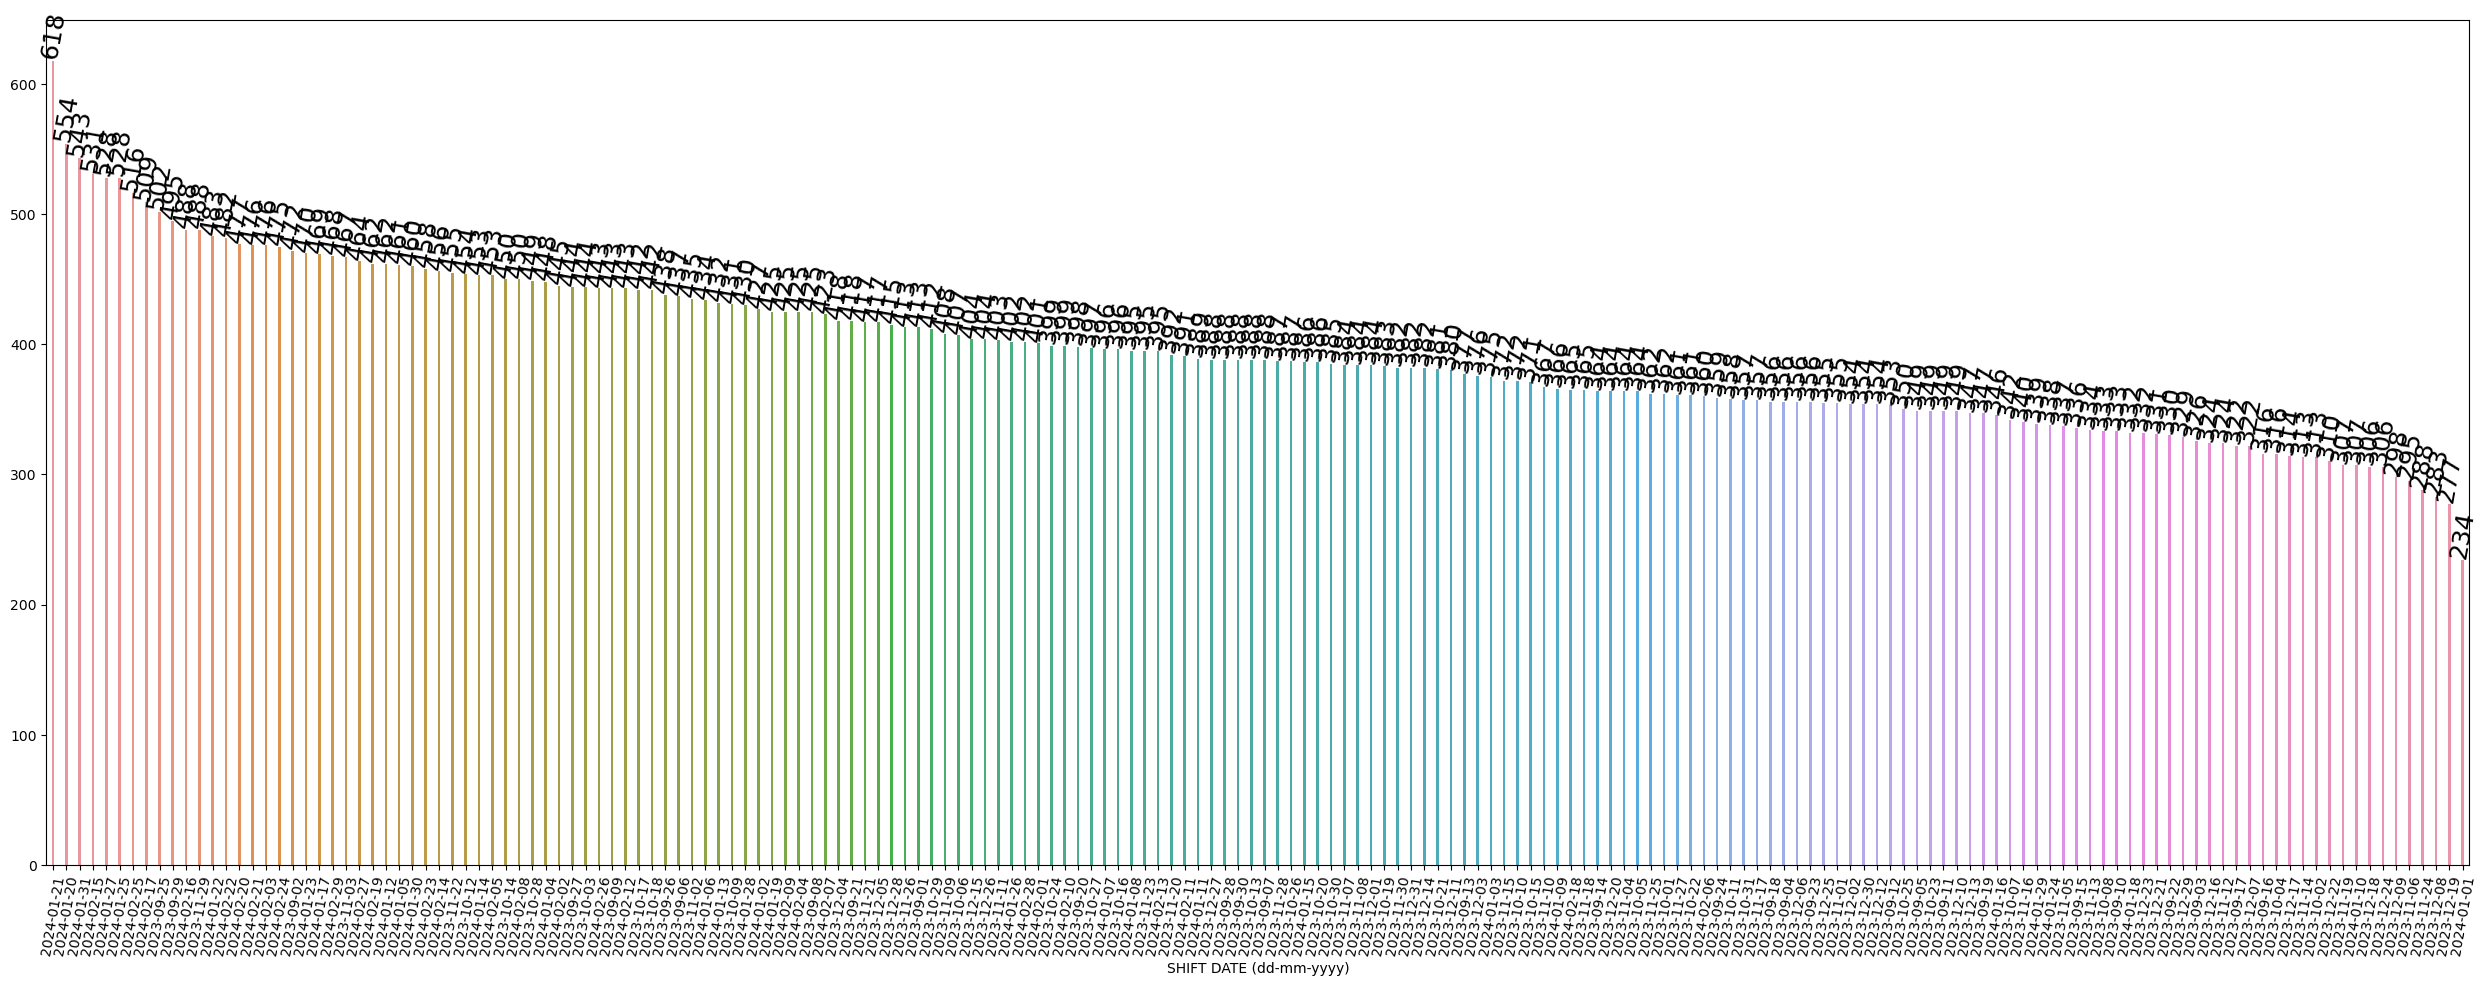

In [16]:
plt.figure(figsize=(25,10))
ax=sns.barplot(x=df["SHIFT DATE (dd-mm-yyyy)"].value_counts().index,y=df["SHIFT DATE (dd-mm-yyyy)"].value_counts().values,width=0.2 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="center")
ax.bar_label(ax.containers[0], fontsize=18,rotation=80)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

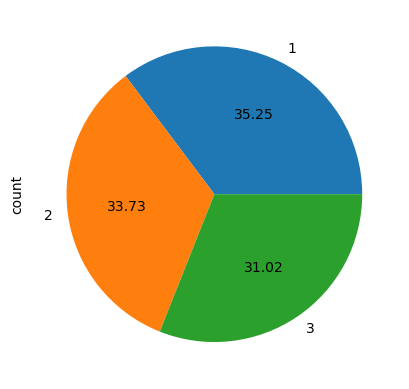

In [17]:
df['SHIFT ID'].value_counts().plot(kind='pie',autopct='%.2f')

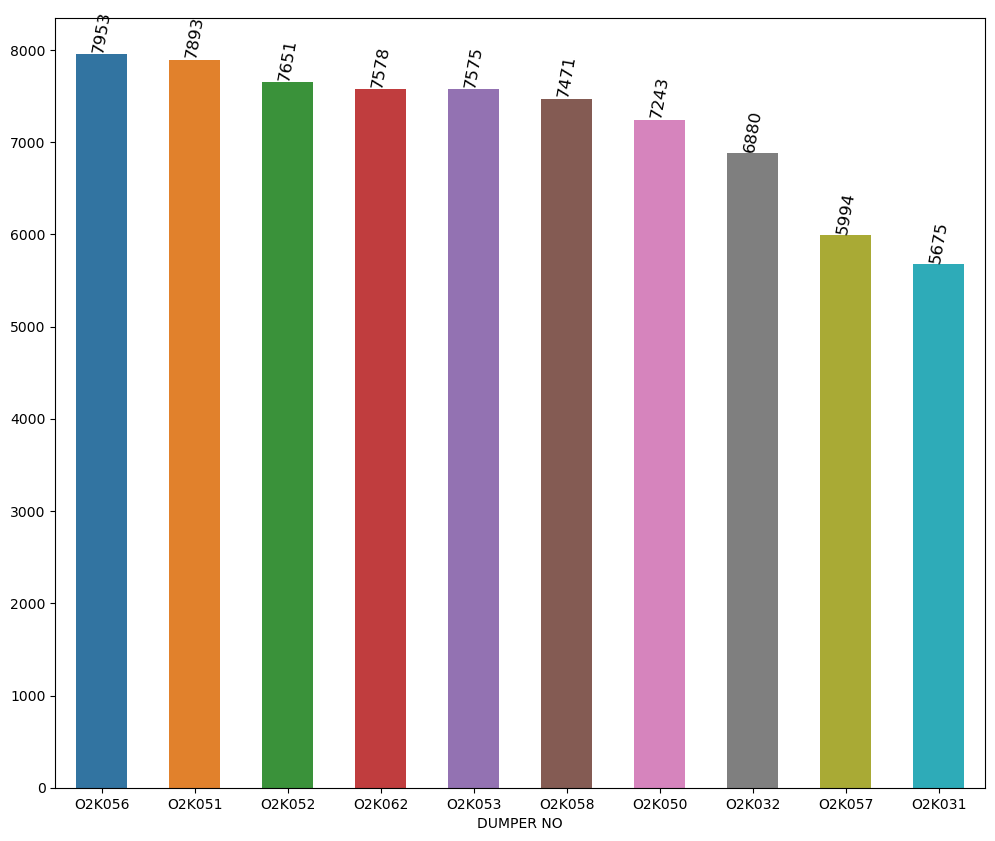

In [18]:
plt.figure(figsize=(12,10))
ax=sns.barplot(x=df["DUMPER NO"].value_counts().index,y=df["DUMPER NO"].value_counts().values,width=0.55)
ax.bar_label(ax.containers[0], fontsize=12,rotation=80)
plt.show()

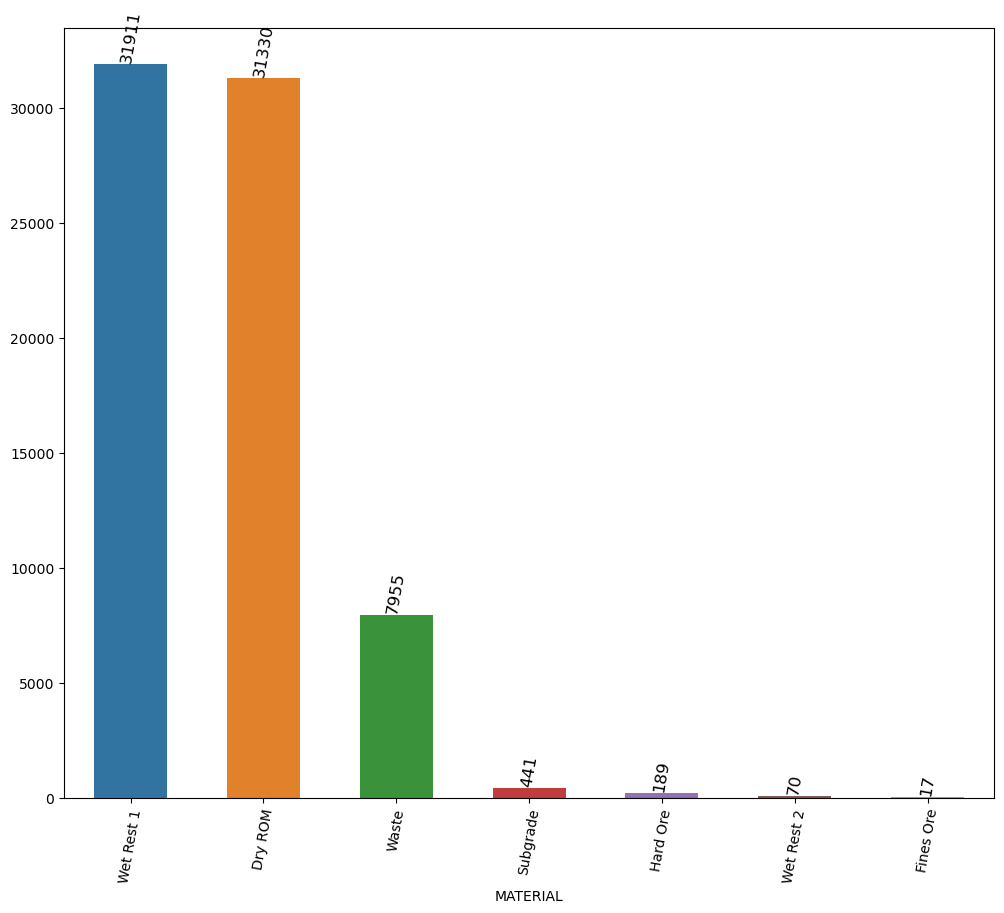

In [19]:
plt.figure(figsize=(12,10))
ax=sns.barplot(x=df["MATERIAL"].value_counts().index,y=df["MATERIAL"].value_counts().values,width=0.55)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="center")
ax.bar_label(ax.containers[0], fontsize=12,rotation=80)
plt.show()

In [20]:
df.sample(5)

,CYCLE START,SHIFT DATE (dd-mm-yyyy),SHIFT ID,OPERATOR NAME,DUMPER NO,ASSIGNED TO SHOVEL,LOAD LOCATION NAME,MATERIAL,DUMP LOCATION NAME,EMPTY TIME (minutes),...,SPOTTING TIME (minutes),LOADING TIME (minutes),HAULING TIME (minutes),HAULING STOP TIME (minutes),WAITING TIME DUMP (minutes),DUMP TIME (minutes),LOAD TONS,TOTAL LEAD DISTANCE (KM),TOTAL CYCLE TIME (minutes),FUEL CONSUMED (in ltrs)
13320,2023-12-01 10:48:30,2023-12-01,1,Giridhari Moharana,O2K053,E582,WPIT_564_MRL,Dry ROM,NEW DRY CIRCUIT PLANT,8.73,...,0.5,3.87,8.75,0.02,4.98,0.35,103.8,6.597,27.30,22.7611
23403,2023-12-30 04:35:07,2023-12-29,3,Lalmohan Hembram,O2K052,W2K005,DRY PLANT STOCK,Dry ROM,NEW DRY CIRCUIT PLANT,2.00,...,0.0,3.65,0.72,0.02,7.35,0.20,96.7,0.819,14.11,6.5297
8588,2024-01-22 00:10:06,2024-01-21,3,Lalmohan Hembram,O2K052,W2K005,Tripathy Stock,Dry ROM,C&S PLANT,2.73,...,0.0,0.20,4.45,0.00,0.00,0.32,97.9,1.271,8.55,12.5
31535,2024-02-18 00:54:07,2024-02-17,3,Sandhya Bobonga,O2K050,W2K005,DRY PLANT STOCK,Dry ROM,NEW DRY CIRCUIT PLANT,2.27,...,0.0,3.68,0.90,0.02,5.55,0.57,91.3,0.634,13.14,3.9179
32051,2024-02-19 10:28:43,2024-02-19,1,Sangeeta Rout,O2K058,E582,Hill_5_612_Stock,Wet Rest 1,WET PRIMARY CRUSHER,1.98,...,0.0,3.07,2.37,0.02,2.70,0.22,95.9,0.849,11.39,5.2237


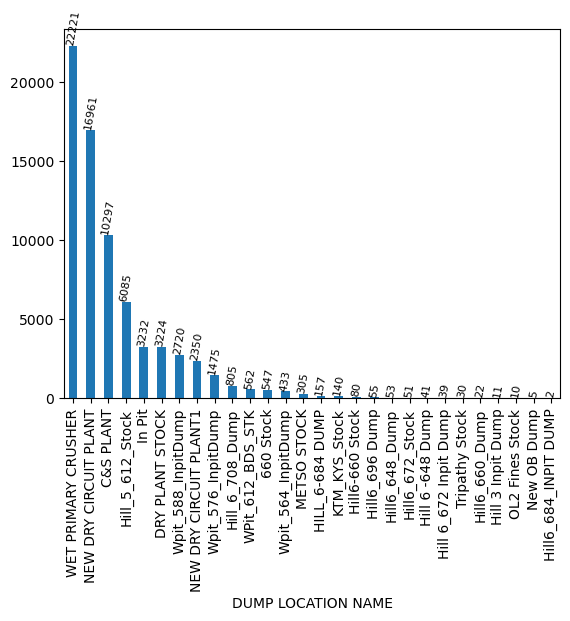

In [21]:
ax=df["DUMP LOCATION NAME"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=8,rotation=80)
plt.show()

<Axes: xlabel='FUEL CONSUMED (in ltrs)', ylabel='LOAD TONS'>

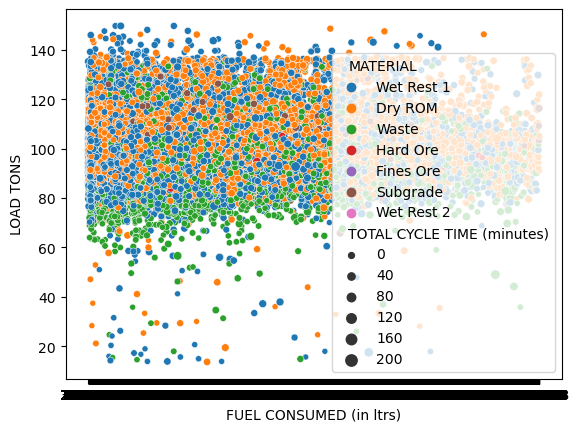

In [22]:
sns.scatterplot(x=df['FUEL CONSUMED (in ltrs)'],y=df['LOAD TONS'],hue=df["MATERIAL"],size=df['TOTAL CYCLE TIME (minutes)'],legend="auto")

<Axes: xlabel='FUEL CONSUMED (in ltrs)', ylabel='TOTAL CYCLE TIME (minutes)'>

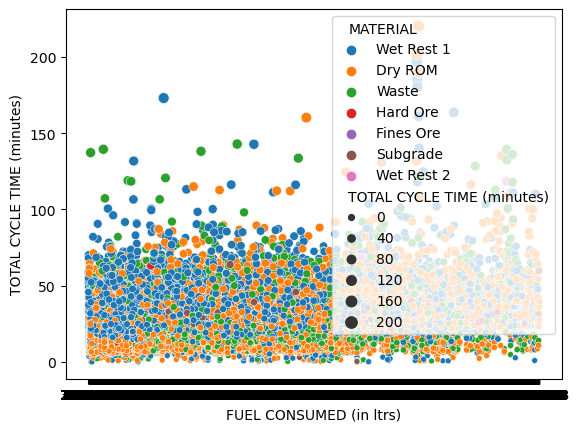

In [23]:
sns.scatterplot(x=df['FUEL CONSUMED (in ltrs)'],y=df['TOTAL CYCLE TIME (minutes)'],hue=df["MATERIAL"],size=df['TOTAL CYCLE TIME (minutes)'],legend="auto")

In [24]:
#add features 
df["Empty_Dumper"]=df["EMPTY TIME  (minutes)"]+df["LOADING TIME (minutes)"]+df["SPOTTING TIME (minutes)"]+df["WAITING TIME DUMP (minutes)"]+df["EMPTY STOP TIME (minutes)"]+df["QUEUE AT LU (minutes)"]+df["WAIT AT LU (minutes)"]
df["Filled_Dumper"]=df["HAULING    TIME (minutes)"]+df["HAULING STOP     TIME (minutes)"]+df["DUMP TIME (minutes)"]

In [25]:
data = df[['LOAD TONS',"Empty_Dumper","Filled_Dumper",'TOTAL LEAD DISTANCE (KM)','MATERIAL','FUEL CONSUMED (in ltrs)','TOTAL CYCLE TIME (minutes)']]

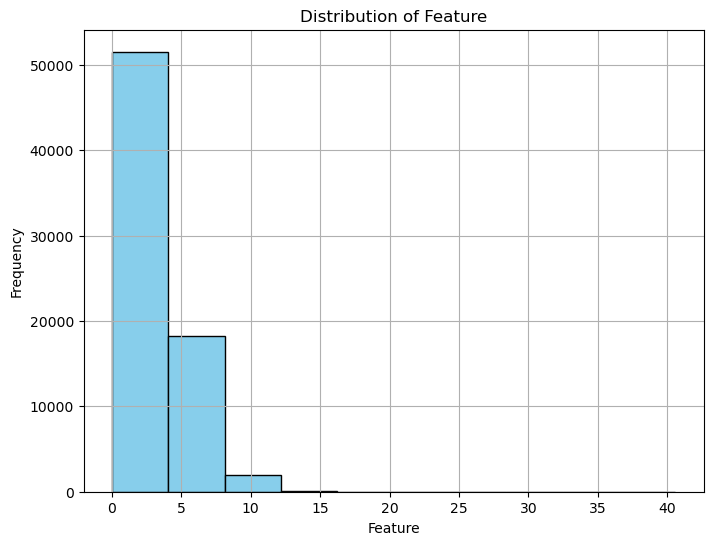

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df['TOTAL LEAD DISTANCE (KM)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Distribution of Feature')
plt.grid(True)
plt.show()

In [27]:
  def one_hot_encode_with_threshold(data, column_name, threshold):
   
    category_counts = data[column_name].value_counts()
    
    
    categories_above_threshold = category_counts[category_counts >= threshold].index.tolist()
    
   
    data['{}_category'.format(column_name)] = data[column_name].apply(lambda x: x if x in categories_above_threshold else 'others')
    
   
    data['{}_category'.format(column_name)] = pd.Categorical(data['{}_category'.format(column_name)], categories=categories_above_threshold + ['others'])
    
   
    one_hot_encoder = OneHotEncoder()
    
   
    one_hot_encoded = one_hot_encoder.fit_transform(data[['{}_category'.format(column_name)]])
    
   
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['{}_category'.format(column_name)]))
    
  
    data = pd.concat([data, one_hot_encoded_df], axis=1)
    

    data.drop([column_name, '{}_category'.format(column_name)], axis=1, inplace=True)
    
    return data

data = one_hot_encode_with_threshold(data,'MATERIAL',500)

C:\Users\91737\AppData\Local\Temp\ipykernel_8316\1150961423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['{}_category'.format(column_name)] = data[column_name].apply(lambda x: x if x in categories_above_threshold else 'others')
C:\Users\91737\AppData\Local\Temp\ipykernel_8316\1150961423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['{}_category'.format(column_name)] = pd.Categorical(data['{}_category'.format(column_name)], categories=categories_above_threshold + ['others'])


In [28]:

mask = data.isin([np.inf, -np.inf]).any(axis=1)
data = data[~mask]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71913 entries, 0 to 71912
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOAD TONS                     71913 non-null  float64
 1   Empty_Dumper                  71913 non-null  float64
 2   Filled_Dumper                 71913 non-null  float64
 3   TOTAL LEAD DISTANCE (KM)      71913 non-null  float64
 4   FUEL CONSUMED (in ltrs)       71913 non-null  object 
 5   TOTAL CYCLE TIME (minutes)    71913 non-null  float64
 6   MATERIAL_category_Dry ROM     71913 non-null  float64
 7   MATERIAL_category_Waste       71913 non-null  float64
 8   MATERIAL_category_Wet Rest 1  71913 non-null  float64
 9   MATERIAL_category_others      71913 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.5+ MB


In [30]:

data = data[data['FUEL CONSUMED (in ltrs)'] != '--N.D--']
data['FUEL CONSUMED (in ltrs)'] = data['FUEL CONSUMED (in ltrs)'].astype(float)

In [31]:

nan_rows = data[data.isnull().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values detected. Removing them.")
    data = data.dropna()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71849 entries, 0 to 71912
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOAD TONS                     71849 non-null  float64
 1   Empty_Dumper                  71849 non-null  float64
 2   Filled_Dumper                 71849 non-null  float64
 3   TOTAL LEAD DISTANCE (KM)      71849 non-null  float64
 4   FUEL CONSUMED (in ltrs)       71849 non-null  float64
 5   TOTAL CYCLE TIME (minutes)    71849 non-null  float64
 6   MATERIAL_category_Dry ROM     71849 non-null  float64
 7   MATERIAL_category_Waste       71849 non-null  float64
 8   MATERIAL_category_Wet Rest 1  71849 non-null  float64
 9   MATERIAL_category_others      71849 non-null  float64
dtypes: float64(10)
memory usage: 6.0 MB


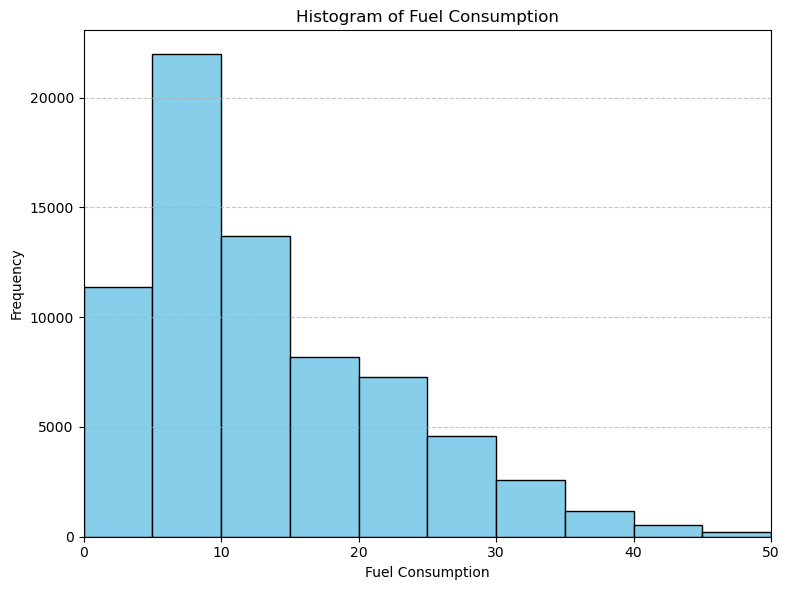

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(data['FUEL CONSUMED (in ltrs)'],range=(0, 50), bins=10, color='skyblue', edgecolor='black')


plt.title('Histogram of Fuel Consumption')
plt.xlabel('Fuel Consumption')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

In [34]:
len(data)

71849

In [35]:
data = data[data['FUEL CONSUMED (in ltrs)'] <= 35]

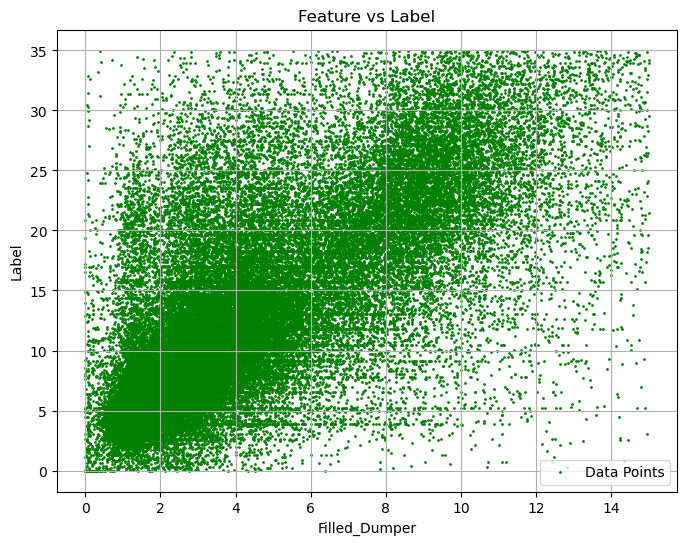

In [36]:
data = data[data['Filled_Dumper'] <= 15]
plt.figure(figsize=(8, 6))
plt.scatter(data['Filled_Dumper'], data['FUEL CONSUMED (in ltrs)'], color='green', label='Data Points',s=1)
plt.xlabel('Filled_Dumper')
plt.ylabel('Label')
plt.title('Feature vs Label')
plt.grid(True)
plt.legend()
plt.show()

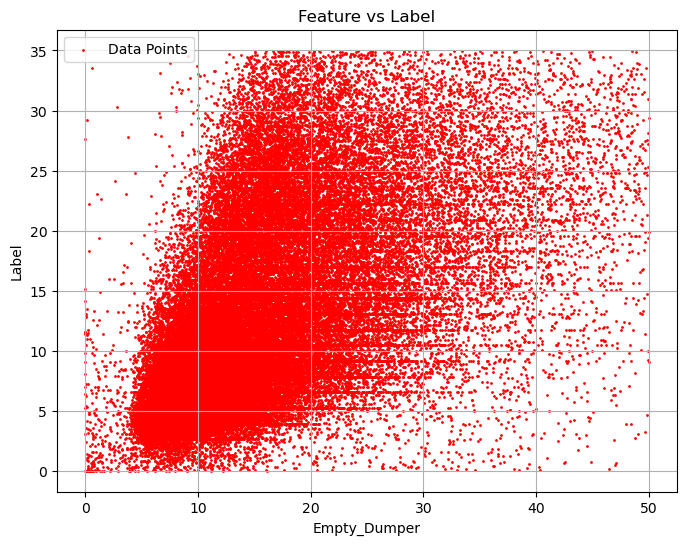

In [37]:
data = data[data['Empty_Dumper'] <= 50]
plt.figure(figsize=(8, 6))
plt.scatter(data['Empty_Dumper'], data['FUEL CONSUMED (in ltrs)'], color='red', label='Data Points',s=1)
plt.xlabel('Empty_Dumper')
plt.ylabel('Label')
plt.title('Feature vs Label')
plt.grid(True)
plt.legend()
plt.show()

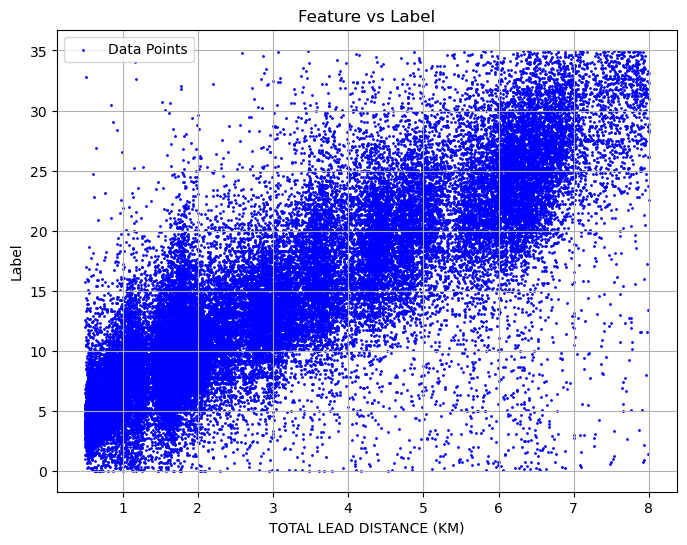

In [38]:
data = data[data['TOTAL LEAD DISTANCE (KM)'] <= 8]
data = data[data['TOTAL LEAD DISTANCE (KM)'] > 0.5]
plt.figure(figsize=(8, 6))
plt.scatter(data['TOTAL LEAD DISTANCE (KM)'], data['FUEL CONSUMED (in ltrs)'], color='blue', label='Data Points',s=1)
plt.xlabel('TOTAL LEAD DISTANCE (KM)')
plt.ylabel('Label')
plt.title('Feature vs Label')
plt.grid(True)
plt.legend()
plt.show()

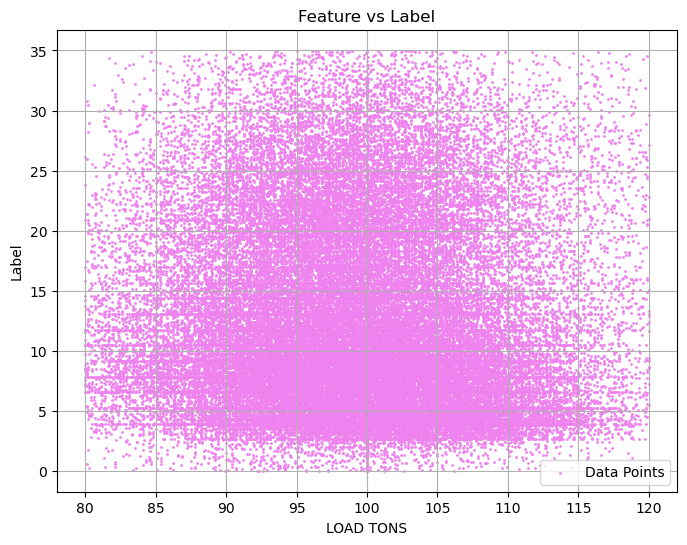

In [39]:
data = data[data['LOAD TONS'] >= 80]
data = data[data['LOAD TONS'] <= 120]
plt.figure(figsize=(8, 6))
plt.scatter(data['LOAD TONS'], data['FUEL CONSUMED (in ltrs)'], color='violet', label='Data Points',s=1)
plt.xlabel('LOAD TONS')
plt.ylabel('Label')
plt.title('Feature vs Label')
plt.grid(True)
plt.legend()
plt.show()
#fuel consumed is mentioned as label in these graph

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62801 entries, 0 to 71912
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOAD TONS                     62801 non-null  float64
 1   Empty_Dumper                  62801 non-null  float64
 2   Filled_Dumper                 62801 non-null  float64
 3   TOTAL LEAD DISTANCE (KM)      62801 non-null  float64
 4   FUEL CONSUMED (in ltrs)       62801 non-null  float64
 5   TOTAL CYCLE TIME (minutes)    62801 non-null  float64
 6   MATERIAL_category_Dry ROM     62801 non-null  float64
 7   MATERIAL_category_Waste       62801 non-null  float64
 8   MATERIAL_category_Wet Rest 1  62801 non-null  float64
 9   MATERIAL_category_others      62801 non-null  float64
dtypes: float64(10)
memory usage: 5.3 MB


In [41]:
data = data.dropna()
#columns_to_drop = ['FUEL CONSUMED (in ltrs)','MATERIAL_category_Dry ROM','MATERIAL_category_Waste','MATERIAL_category_Wet Rest 1','MATERIAL_category_others']
columns_to_drop = ['FUEL CONSUMED (in ltrs)']
x = data.drop(columns = columns_to_drop).values
y = data['FUEL CONSUMED (in ltrs)'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 12.522488358015126


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) score:", r2)

R-squared (R2) score: 0.7817256519033868


In [46]:
#78.1% accuracy in linear regression model 

In [47]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)
#78.8% accuracy score in random forest algorithm

Mean Squared Error: 12.115152752410511
R-squared (R2) score: 0.7888257514385546


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)

print("R-squared (R2) score:", r2)

#79.33% accuracy score using gradient boosting which is the best till now.

Mean Squared Error: 11.857284670757206
R-squared (R2) score: 0.7933205439916475


In [50]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.004412142640199


In [51]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) score:", r2)
#79.07% accuracy score using XGboost

R-squared (R2) score: 0.7907560254954649


In [52]:
inputs = np.array([89.2,23.3,5.91,4.683,23.3+5.91,0,0,1,0]).reshape(1,9)

In [53]:
#predcition 
linear.predict(inputs)

array([18.57086264])

In [54]:
rf.predict(inputs)

array([20.065669])

In [55]:
gb_regressor.predict(inputs)

array([18.88214685])

In [56]:
xgb_regressor.predict(inputs)

array([20.571129], dtype=float32)

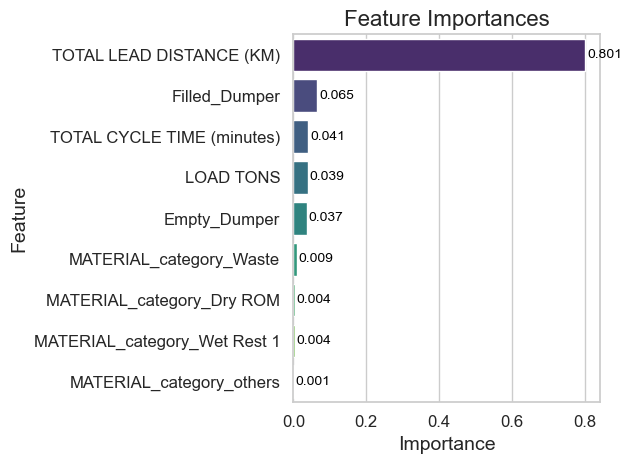

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)

feature_importances = regressor.feature_importances_


indices = np.argsort(feature_importances)[::-1]
X =data.drop(columns = columns_to_drop)

sns.set(style="whitegrid")


sns.barplot(x=feature_importances[indices], y=[X.columns[i] for i in indices], palette="viridis")

plt.title("Feature Importances", fontsize=16)  
plt.xlabel("Importance", fontsize=14) 
plt.ylabel("Feature", fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

for i, v in enumerate(feature_importances[indices]):
    plt.text(v + 0.005, i, f"{v:.3f}", color='black', va='center', fontsize=10) 

plt.tight_layout()  # Ensures proper spacing
plt.show()


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchsummary import summary

In [64]:
BATCH_SIZE = 128
lr = 0.001

input_size = x.shape[1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [65]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)


In [66]:
import torch
import torch.nn as nn

class FuelConsumptionModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, dropout_rate):
        super(FuelConsumptionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = self.dropout1(out)
        out = torch.relu(self.fc2(out))
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

dropout_rate = 0.5

model = FuelConsumptionModel(input_size, 128, 256, dropout_rate)


In [67]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
#optimizer = optim.RMSprop(model.parameters(), lr=0.01)
#optimizer = optim.SGD(model.parameters(), lr=lr)

In [68]:
num_epochs = 60

def eval():
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        val_loss = criterion(y_pred, y_test)
        print(f'Val Loss: {val_loss.item()}')
        model.train()
        return val_loss.item()

train_loss = []
val_loss  = []
for epoch in range(num_epochs):
    losses = []
    for inputs, targets in train_dl:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch%5 == 0 and epoch != 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, \nLoss: {sum(losses)/len(losses)}')
        val_loss.append(eval())
        train_loss.append(sum(losses)/len(losses))

Epoch 6/60, 
Loss: 14.99944987430524
Val Loss: 12.154435157775879
Epoch 11/60, 
Loss: 14.366912629464807
Val Loss: 12.039443969726562
Epoch 16/60, 
Loss: 13.991697796731808
Val Loss: 12.16068172454834
Epoch 21/60, 
Loss: 13.696770726269438
Val Loss: 12.236766815185547
Epoch 26/60, 
Loss: 13.630144837551748
Val Loss: 12.165461540222168
Epoch 31/60, 
Loss: 13.620523065707763
Val Loss: 11.996964454650879
Epoch 36/60, 
Loss: 13.418439162596492
Val Loss: 12.278865814208984
Epoch 41/60, 
Loss: 13.250449493641161
Val Loss: 12.010001182556152
Epoch 46/60, 
Loss: 13.29321978595724
Val Loss: 11.963641166687012
Epoch 51/60, 
Loss: 13.174296859566493
Val Loss: 12.034789085388184
Epoch 56/60, 
Loss: 13.048409051870875
Val Loss: 12.040590286254883


In [69]:
inputs = np.array([89.2,23.3,5.91,4.683,23.3+5.91,0,0,1,0]).reshape(1,9)

In [70]:
inp = scaler.fit_transform(inputs)
inp = torch.tensor(inp, dtype=torch.float32)

In [71]:
model.eval()
model(torch.tensor(inp)).detach().item()

C:\Users\91737\AppData\Local\Temp\ipykernel_8316\16499889.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(inp)).detach().item()


12.506328582763672

In [72]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    r2 = r2_score(y_test.numpy(), y_pred.numpy())

print("R2 Score:", r2)

R2 Score: 0.7900977114638349
